# Install library to read Relian .star files
We're using mrcz because it was pip installable (meaning it was easy to install):
https://python-mrcz.readthedocs.io/index.html

In [5]:
%pip install mrcz

     |████████████████████████████████| 40kB 82kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [10]:
import mrcz.ReliablePy as mrp

In [11]:
# create data object
rln = mrp.ReliablePy()

In [12]:
#load in files
# Wildcards can be loaded
rln.load( '17may27a_L33_1d_00016gr_00125sq_v01_00007hln_00005enn-a_local.star')
    

DEBUG: lookup = {1: b'MicrographName', 2: b'CoordinateX', 3: b'CoordinateY', 4: b'Voltage', 5: b'DefocusU', 6: b'DefocusV', 7: b'DefocusAngle', 8: b'SphericalAberration', 9: b'DetectorPixelSize', 10: b'CtfFigureOfMerit', 11: b'Magnification', 12: b'AmplitudeContrast', 13: b'AutopickFigureOfMerit'}


In [14]:
#see what data is available - the file gets loaded in as a dictionary of dictionaries
# b' means data_ is a binary string
rln.star.keys()

odict_keys([b'data_'])

In [17]:
#lets see what fields we have for the relion style
rln.star[b'data_'].keys()

odict_keys([b'MicrographName', b'CoordinateX', b'CoordinateY', b'Voltage', b'DefocusU', b'DefocusV', b'DefocusAngle', b'SphericalAberration', b'DetectorPixelSize', b'CtfFigureOfMerit', b'Magnification', b'AmplitudeContrast', b'AutopickFigureOfMerit'])

In [37]:
#convert the star file to a spreadsheet
#can be done directly since it's an ordered dictionary of ordered dictionaries
import pandas as pd
dfstar = pd.DataFrame(rln.star[b'data_'])

In [58]:
#let's look at that spreadsheet
dfstar.head()

,b'MicrographName',b'CoordinateX',b'CoordinateY',b'Voltage',b'DefocusU',b'DefocusV',b'DefocusAngle',b'SphericalAberration',b'DetectorPixelSize',b'CtfFigureOfMerit',b'Magnification',b'AmplitudeContrast',b'AutopickFigureOfMerit'
0,b'aligned/17may27a_L33_1d_00016gr_00125sq_v01_...,2336.0,336.0,300.0,17178.685547,19613.064453,5.996486,2.7,5.0,0.010898,45454.542969,0.001,0.824345
1,b'aligned/17may27a_L33_1d_00016gr_00125sq_v01_...,3116.0,228.0,300.0,17204.728516,19639.107422,5.996486,2.7,5.0,0.013667,45454.542969,0.001,0.655404
2,b'aligned/17may27a_L33_1d_00016gr_00125sq_v01_...,724.0,496.0,300.0,17467.830078,19902.208984,5.996486,2.7,5.0,0.004492,45454.542969,0.001,0.214542
3,b'aligned/17may27a_L33_1d_00016gr_00125sq_v01_...,1016.0,540.0,300.0,17555.066406,19989.445312,5.996486,2.7,5.0,0.004144,45454.542969,0.001,0.572232
4,b'aligned/17may27a_L33_1d_00016gr_00125sq_v01_...,2752.0,528.0,300.0,16902.119141,19336.498047,5.996486,2.7,5.0,0.012169,45454.542969,0.001,0.690324


In [55]:
# get the string version of all the column names
cn2str = dict([(cn, cn.decode('utf-8'))for cn in dfstar.columns])
cn2str

{b'MicrographName': 'MicrographName',
 b'CoordinateX': 'CoordinateX',
 b'CoordinateY': 'CoordinateY',
 b'Voltage': 'Voltage',
 b'DefocusU': 'DefocusU',
 b'DefocusV': 'DefocusV',
 b'DefocusAngle': 'DefocusAngle',
 b'SphericalAberration': 'SphericalAberration',
 b'DetectorPixelSize': 'DetectorPixelSize',
 b'CtfFigureOfMerit': 'CtfFigureOfMerit',
 b'Magnification': 'Magnification',
 b'AmplitudeContrast': 'AmplitudeContrast',
 b'AutopickFigureOfMerit': 'AutopickFigureOfMerit'}

In [59]:
#Let's rename those columns
dfstar = dfstar.rename(columns=cn2str)
dfstar.head()

,MicrographName,CoordinateX,CoordinateY,Voltage,DefocusU,DefocusV,DefocusAngle,SphericalAberration,DetectorPixelSize,CtfFigureOfMerit,Magnification,AmplitudeContrast,AutopickFigureOfMerit
0,b'aligned/17may27a_L33_1d_00016gr_00125sq_v01_...,2336.0,336.0,300.0,17178.685547,19613.064453,5.996486,2.7,5.0,0.010898,45454.542969,0.001,0.824345
1,b'aligned/17may27a_L33_1d_00016gr_00125sq_v01_...,3116.0,228.0,300.0,17204.728516,19639.107422,5.996486,2.7,5.0,0.013667,45454.542969,0.001,0.655404
2,b'aligned/17may27a_L33_1d_00016gr_00125sq_v01_...,724.0,496.0,300.0,17467.830078,19902.208984,5.996486,2.7,5.0,0.004492,45454.542969,0.001,0.214542
3,b'aligned/17may27a_L33_1d_00016gr_00125sq_v01_...,1016.0,540.0,300.0,17555.066406,19989.445312,5.996486,2.7,5.0,0.004144,45454.542969,0.001,0.572232
4,b'aligned/17may27a_L33_1d_00016gr_00125sq_v01_...,2752.0,528.0,300.0,16902.119141,19336.498047,5.996486,2.7,5.0,0.012169,45454.542969,0.001,0.690324


# Recreate Figures in Excel sheet
we're 1st checking if we're reading the files in correctly by trying to recreate the images in 17may27a_L33_1d_00016gr_00125sq_v01_00007hln_00005enn_cs.xlsx*

Note that the colors are different, so we're focusing on getting the same grouped striping effect (Also, I have no idea what these are supposed to be multiplied by/how they're supposed to be processed). 

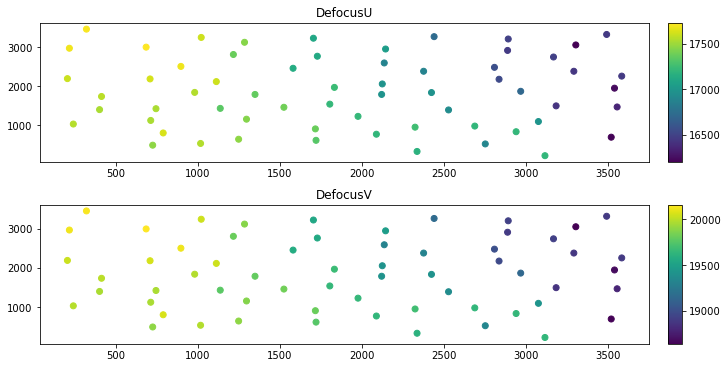

In [119]:
%matplotlib inline 
import matplotlib.pyplot as plt #plotting library
# constrained_layout is to cleanup spacing between plots, 
# _= is to supress print statements
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10,5), constrained_layout=True)
_ = ax1.set_title("DefocusU")
#using the data keyword argument, we can just identify the columns
im1 = ax1.scatter('CoordinateX', 'CoordinateY', c='DefocusU', data =dfstar)
_ = fig.colorbar(im1, ax=ax1)
_ = ax2.set_title("DefocusV")
im2 = ax2.scatter('CoordinateX', 'CoordinateY', c='DefocusV', data=dfstar)
_ = fig.colorbar(im2, ax=ax2)

# Now let's parse the log file
Note: you might want to do this in pieces in the tutorial. The way I worked through this/built it up is as follows:

#### Open the file
Use a content manager to open and read in the log file
Context managers are used because they close the file when finished with reading it

In [106]:
with open('17may27a_L33_1d_00016gr_00125sq_v01_00007hln_00005enn_frames_ctffind3.log') as f:
    print(f.readlines())

['CS[mm], HT[kV], AmpCnst, XMAG, DStep[um]\n', '2.7 300.0 0.07 45454.545454545454545454545455 50000\n', '18706.6135279480450000 17174.1264720519550000 85 1 0 Final Values\n']


#### Get the first line/header

Use next to grab the first line of the file since open returns a generator over the file


A generator is kind of like a loop except the next item is grabbed on the fly instead of everything loaded at once. Making a burger fresh per order (generator) vs. having them all frozen in back (list)

In [107]:
with open('17may27a_L33_1d_00016gr_00125sq_v01_00007hln_00005enn_frames_ctffind3.log') as f:
    print(next(f))

CS[mm], HT[kV], AmpCnst, XMAG, DStep[um]



#### Parse the header
Now parse the header using strip to remove the new line and split to break on the commas

In [108]:
with open('17may27a_L33_1d_00016gr_00125sq_v01_00007hln_00005enn_frames_ctffind3.log') as f:
    header = next(f).strip("\n").split(",")
    print(header)

['CS[mm]', ' HT[kV]', ' AmpCnst', ' XMAG', ' DStep[um]']


#### Get the other lines
Now lets look at the rest of the lines. That first next removes the first line, so the loop will print the rest

In [109]:
with open('17may27a_L33_1d_00016gr_00125sq_v01_00007hln_00005enn_frames_ctffind3.log') as f:
    header = next(f).strip("\n").split(",") 
    for line in f:
        print(line)

2.7 300.0 0.07 45454.545454545454545454545455 50000

18706.6135279480450000 17174.1264720519550000 85 1 0 Final Values



#### Flag the last line
Let's pull out the last line since it's flagged differently. We know it's got `Final Values` at the end so lets look for that

In [110]:
with open('17may27a_L33_1d_00016gr_00125sq_v01_00007hln_00005enn_frames_ctffind3.log') as f:
    header = next(f).strip("\n").split(",") 
    for line in f:
        if line.endswith("Final Values\n"):
            print("LAST: ", line)

LAST:  18706.6135279480450000 17174.1264720519550000 85 1 0 Final Values



#### Build spreadsheet by building list of lines

We create an empty list `loglines` to store our lines, and use pass to ignore the final values flag for now

In [111]:
loglines = []
with open('17may27a_L33_1d_00016gr_00125sq_v01_00007hln_00005enn_frames_ctffind3.log') as f:
    header = next(f).strip("\n").split(",") 
    for line in f:
        if line.endswith("Final Values\n"):
            pass
        loglines.append(line.strip("\n").split(" "))
        

#### Create spreadsheet using pandas

In [113]:
pd.DataFrame(loglines, columns=header)

ValueError: 5 columns passed, passed data had 7 columns

#### Lets use that last line flag
The spreadsheet creation failed because the last line is 7 columns when we only have 5 column headers. To make sure we're always passing in 5 columns of data, let's strip the final marker out of the last line. 
(Note, I have no idea how this should actually be parsed-Amadee, Dominique?)

In [114]:
loglines = []
with open('17may27a_L33_1d_00016gr_00125sq_v01_00007hln_00005enn_frames_ctffind3.log') as f:
    header = next(f).strip("\n").split(",") 
    for line in f:
        if line.endswith("Final Values\n"):
            line = line.strip("Final Values\n")    
        loglines.append(line.strip("\n").split(" "))
        

#### Lets try again to make that spreadsheet

In [117]:
dflog = pd.DataFrame(loglines, columns=header)

In [118]:
dflog.head()

,CS[mm],HT[kV],AmpCnst,XMAG,DStep[um]
0,2.7,300.0,0.07,45454.545454545454545454545455,50000
1,18706.6135279480450000,17174.1264720519550000,85,1,0


# 